# Zomato Data Analysis Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("Zomato data .csv")

In [3]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

data['rate'] = data['rate'].apply(handleRate)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [8]:
a, b, c, d = 0, 0, 0, 0
for restType in data['listed_in(type)']:
    if restType == 'Buffet':
        a += 1
    elif restType == 'Cafes':
        b += 1
    elif restType == 'Dining':
        c += 1
    else:
        d += 1
print(f'Buffet: {a}')
print(f'Cafes: {b}')
print(f'Dining: {c}')
print(f'Other: {d}')

Buffet: 7
Cafes: 23
Dining: 110
Other: 8


Text(0.5, 0, 'Type of Restaurant')

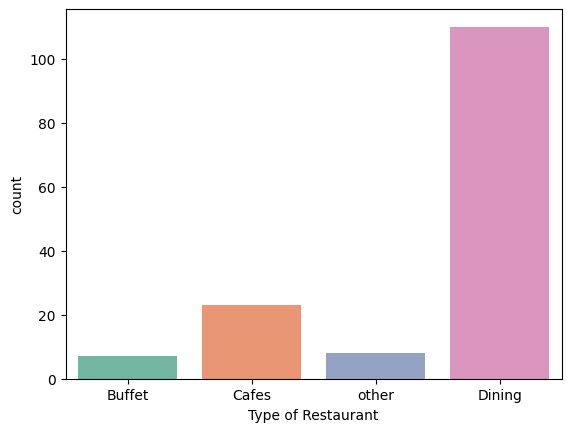

In [9]:
sns.countplot(x = data['listed_in(type)'], hue=data['listed_in(type)'], palette='Set2', legend=False)
plt.xlabel("Type of Restaurant")

### Majority of the restaurant falls in dining category

Text(0, 0.5, 'Votes')

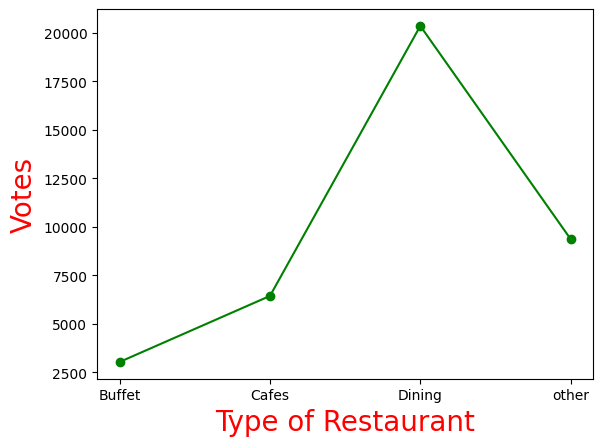

In [10]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of Restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

### Dining restaurants received maximum votes

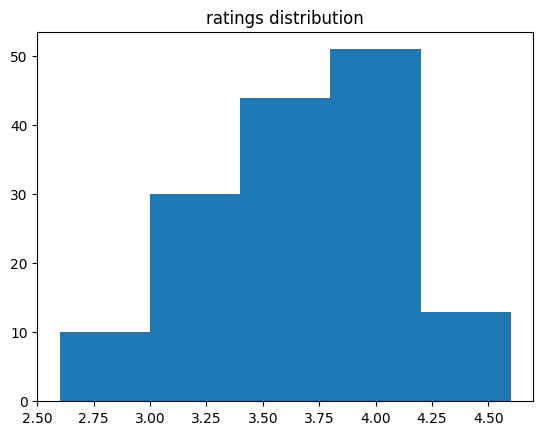

In [11]:
plt.hist(data['rate'], bins=5)
plt.title('ratings distribution')
plt.show()

### Majority restaurants received ratings between 3.5 and 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

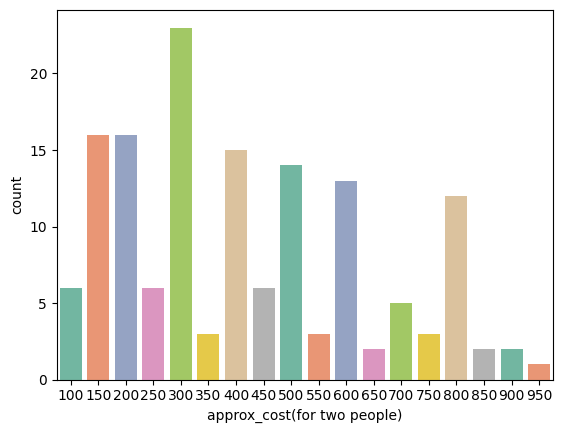

In [12]:
couple_data = data['approx_cost(for two people)']
sns.countplot(x=couple_data, hue=couple_data, palette='Set2', legend=False)

### Majority of couples prefer restaurants with an approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

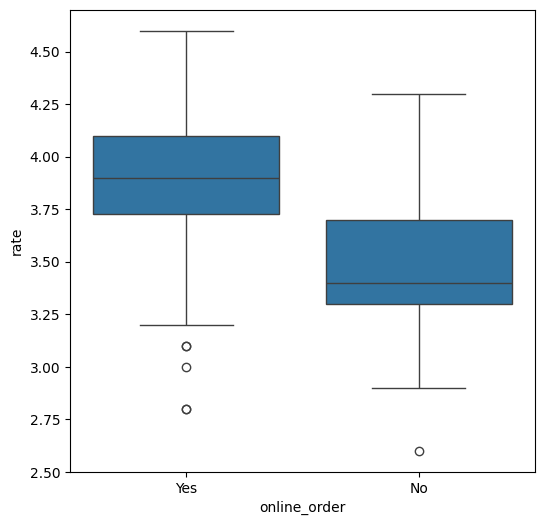

In [13]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=data)

### Offline orders received lower rating compared to online orders

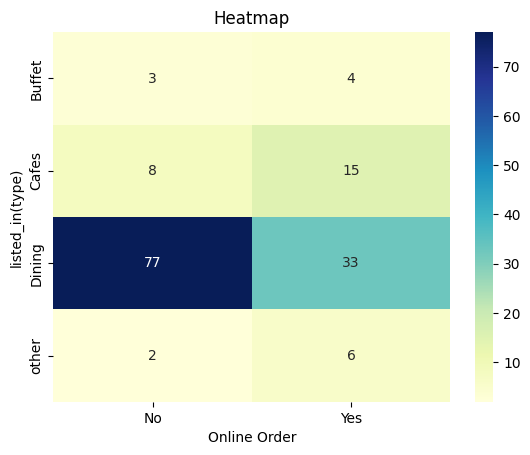

In [14]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('listed_in(type)')
plt.show()

## Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer orders in person at restaurants, but prefer online ordering at cafes.